In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime,timedelta
stock_names=['SPY','META','GOOGL','MSFT']
end_date=datetime.today()
n_years=5
start_date=end_date-timedelta(days=n_years*365)

stock_data=yf.download(tickers=stock_names,start=start_date,end=end_date)
stock_prices=stock_data['Adj Close']

df=pd.concat([stock_prices['SPY'],
             stock_prices['META'],
             stock_prices['GOOGL'],
             stock_prices['MSFT']],axis=1)

[*********************100%***********************]  4 of 4 completed


In [2]:
x=0
SPY=[]
META=[]
GOOGL=[]
MSFT=[]
idx=[]
df1=pd.DataFrame()
for i in df.index:
    if x<7:
        x=x+1
    elif x==7:
        x=1
        idx.append(i)
        SPY.append(df.loc[i][0])
        META.append(df.loc[i][1])
        GOOGL.append(df.loc[i][2])
        MSFT.append(df.loc[i][3])

In [3]:
df1['Index']=idx
df1['SPY']=SPY
df1['META']=META
df1['GOOGL']=GOOGL
df1['MSFT']=MSFT

In [4]:
df1=df1.set_index('Index')

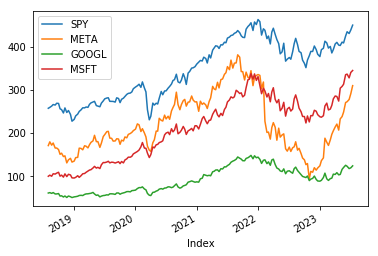

In [5]:
df1.plot()

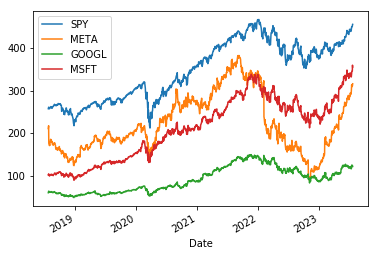

In [6]:
df.plot()

In [7]:
stock_returns=df1.pct_change()
stock_returns

,SPY,META,GOOGL,MSFT
Index,,,,
2018-08-01,NaN,NaN,NaN,NaN
2018-08-10,0.008189,0.050160,0.015831,0.025593
2018-08-21,0.011231,-0.042383,-0.028024,-0.023965
2018-08-30,0.013830,0.029081,0.030417,0.056331
2018-09-11,-0.004306,-0.065864,-0.051378,-0.006342
...,...,...,...,...
2023-06-05,0.038945,0.089001,0.042266,0.070384
2023-06-14,0.023601,0.007222,-0.018570,0.004167
2023-06-26,-0.009464,0.018731,-0.043099,-0.025909


In [8]:
stock_log_returns=np.log(df1/df1.shift(1))
average_log_return=stock_log_returns.mean(1)

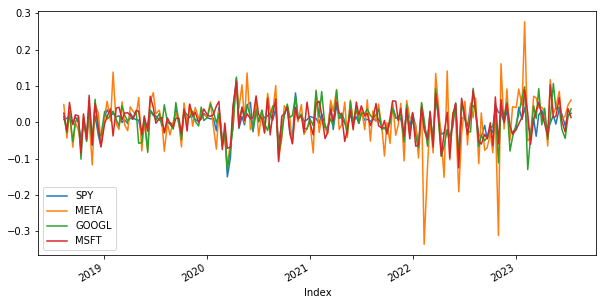

In [9]:
stock_log_returns.plot(figsize=(10,5))

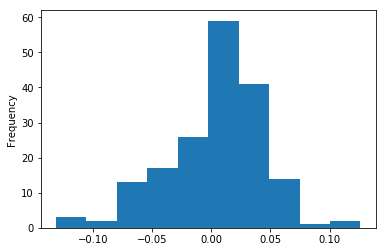

In [10]:
average_log_return.plot.hist(bins=10)

In [11]:
stock_log_returns

,SPY,META,GOOGL,MSFT
Index,,,,
2018-08-01,NaN,NaN,NaN,NaN
2018-08-10,0.008156,0.048943,0.015707,0.025271
2018-08-21,0.011168,-0.043308,-0.028424,-0.024256
2018-08-30,0.013735,0.028666,0.029964,0.054802
2018-09-11,-0.004315,-0.068133,-0.052744,-0.006362
...,...,...,...,...
2023-06-05,0.038206,0.085261,0.041398,0.068017
2023-06-14,0.023327,0.007196,-0.018745,0.004159
2023-06-26,-0.009509,0.018557,-0.044055,-0.026250


In [12]:
weights=stock_log_returns.sub(average_log_return,axis=0)*-1.0
absolute_weights=weights.abs()
absolute_weights_sum=np.sum(absolute_weights,axis=1)
adjusted_weights=weights.div(absolute_weights_sum,axis=0).dropna()#weights/absolute_weights_sum

In [13]:
adjusted_weights.head(3)#- values are shots sell

,SPY,META,GOOGL,MSFT
Index,,,,
2018-08-10,0.324991,-0.485074,0.175009,-0.014926
2018-08-21,-0.500000,0.341375,0.111496,0.047129
2018-08-30,0.392368,0.067910,0.039722,-0.500000


In [14]:
ptf_daily_returns=(adjusted_weights.shift(1)*stock_returns).dropna()

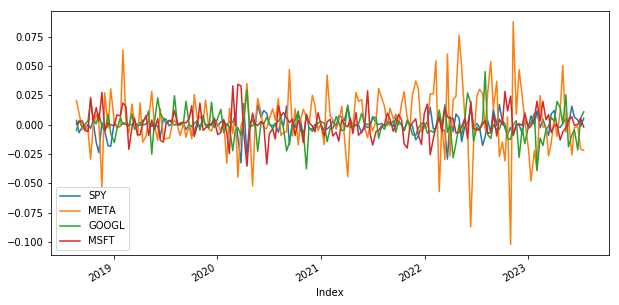

In [15]:
ptf_daily_returns.plot(figsize=(10,5))

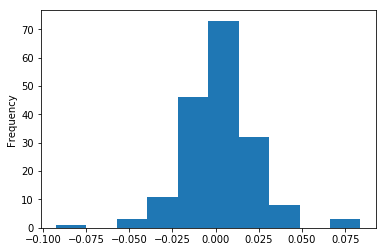

In [16]:
daily_strategy_returns=np.sum(ptf_daily_returns,axis=1)
daily_strategy_returns.plot.hist(bins=10)

In [17]:
np.mean(daily_strategy_returns),daily_strategy_returns.std()

(0.0034244362098488617, 0.020345378018589638)

In [18]:
stock_returns.mean(1).mean(),stock_returns.mean(1).std()

(0.005592646877289297, 0.04116848705606131)

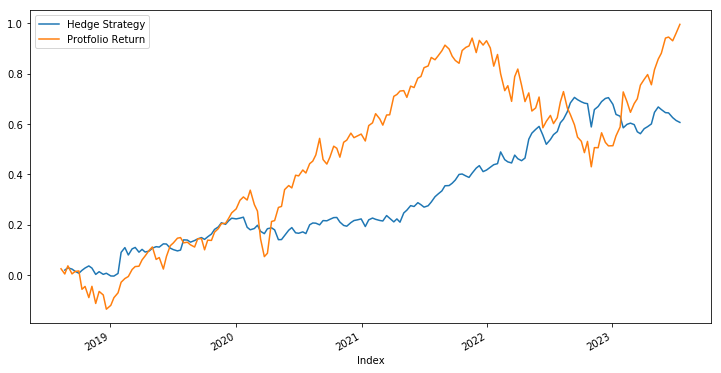

In [19]:
daily_strategy_returns.cumsum().plot(figsize=(12.2,6.4),label='Hedge Strategy',legend=True)
stock_returns.mean(1).cumsum().plot(figsize=(12.2,6.4),label='Protfolio Return',legend=True)

In [20]:
0.003424440401572444*4

0.013697761606289776